In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics
import numpy.ma as ma

In [2]:
from iosubdomains import Variable

In [3]:
exp = diagnostics.plume('../../data/Nyles/plume_ref4/', 'plume_ref4')

In [4]:
exp.params

{'modelname': 'LES',
 'geometry': 'closed',
 'Lx': 4000.0,
 'Ly': 4000.0,
 'Lz': 2000.0,
 'n_tracers': 0,
 'unit_length': 'm',
 'unit_duration': 's',
 'rotating': True,
 'forced': True,
 'coriolis': 0.0001,
 'diff_coef': {},
 'datadir': '/home1/scratch/groullet/data/Nyles',
 'expname': 'plume_ref4',
 'mode': 'overwrite',
 'variables_in_history': ['b', 'u'],
 'timestep_history': 600.0,
 'simplified_grid': True,
 'include_halo': False,
 'disk_space_warning': 0.5,
 'show': False,
 'iterations_per_frame': 4,
 'style': 'b-interface',
 'stable_stratification': False,
 'aspect': 'equal',
 'rotation_speed': 3,
 'tend': 86400.0,
 'timestepping': 'LFAM3',
 'auto_dt': True,
 'dt': 200.0,
 'cfl': 0.8,
 'dt_max': 200.0,
 'global_nx': 32,
 'global_ny': 32,
 'global_nz': 16,
 'orderVF': 5,
 'orderKE': 5,
 'orderA': 5,
 'npx': 2,
 'npy': 2,
 'npz': 1,
 'nh': 3,
 'npre': 3,
 'npost': 3,
 'ndeepest': 20,
 'omega': 0.8,
 'tol': 0.001,
 'maxite': 20,
 'nglue': 1,
 'ncellscoarsest': 32,
 'nx': 16,
 'ny': 1

# Nudging masks

In [293]:
fields = exp.read_vars(['x', 'y', 'z'])
x, y, z = np.meshgrid(fields['x']/exp.params['Lx'] - 0.5, 
                     fields['y']/exp.params['Lx'] - 0.5, 
                     fields['z']/exp.params['Lz'])

d = np.sqrt((XX)**2 + (YY)**2)
#mask = ma.masked_outside(r, 0, r_max)

In [294]:
# d0 = 0.45
# horwidth = 0.05
# h0 = 0.95
# verwidth = 0.025

# dampingcoef = 1./200

# damping = 0.5*(1+np.tanh((d-d0)/horwidth)) # sponge layer
# damping *= 0.5*(1+np.tanh((z-h0)/verwidth)) #in the vertical but it doesn't work here... 
# damping *= dampingcoef

In [295]:
mask_1 = ma.masked_outside(d, 0, 0.45)

In [296]:
mask_2 = ma.masked_outside(z, 0, 0.90)

In [297]:
d_damp = ma.masked_array(d, mask_1.mask)
d_damp = ma.masked_array(d_damp, mask_2.mask)

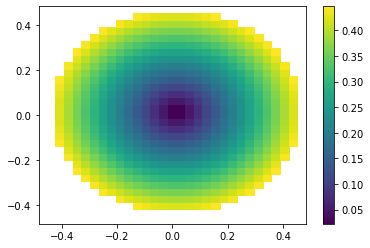

In [298]:
plt.pcolormesh(x[:,:,0], y[:,:,0], d_damp[:,:,0])
plt.colorbar()

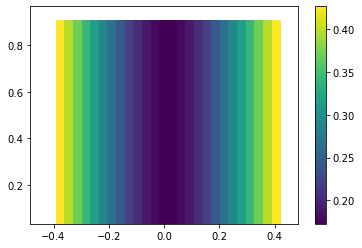

In [299]:
plt.pcolormesh(x[10,:,:], z[10,:,:], d_damp[10,:,:])
plt.colorbar()

# Fluxes

In [300]:
def Flux(flux):
    if flux == 'mass':
        set_integrand = lambda x: x
        
    elif flux == 'momentum':
        set_integrand = lambda x: x**2
        
    elif flux == 'buoyancy':
        b = exp.read_vars('b')['b']
        set_integrand = lambda x: x*b
        
    npx = exp.params['npx']
    Lx = exp.params['Lx']
    Ly = exp.params['Ly']
    Lz = exp.params['Lz']
    nz = exp.params['nz']
    
    dx = Lx/npx
    t = exp.read_vars('t')['t']
    n_time = t.shape[0]
    
    r_max = 0.45 # as in forced_plume_nudging.py
    z_max = 0.95
    
    flux = np.zeros(n_time)
    aux = np.zeros(nz)
    
    fields = exp.read_vars(['w', 'x', 'y', 'z'])
    w = diagnostics.velocity_interpolation(fields['w'], axis=1)
    
    XX, YY, ZZ = np.meshgrid(fields['x']/Lx - 0.5, 
                         fields['y']/Ly - 0.5,
                         fields['z']/Lz)
    
    r = np.sqrt(XX**2 + YY**2)
    mask_1 = ma.masked_outside(r, 0, r_max)
    mask_2 = ma.masked_outside(z, 0, z_max)
    
    # defining integrand
    integrand = set_integrand(w)

    for t in range(n_time):
        field_new = ma.masked_array(integrand[t], mask_1.mask)
        field_new = ma.masked_array(field_new, mask_2.mask)
        flux[t] = field_new.sum()

    return flux

Text(0.5, 0, 'time (hours)')

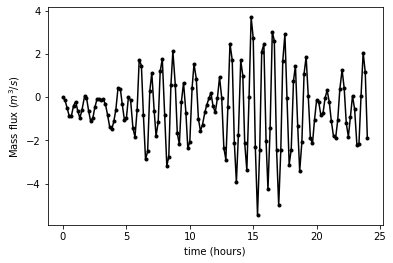

In [301]:
AA = Flux('mass')
plt.plot(exp.time/3600, AA, 'k.-')
plt.ylabel('Mass flux ($m^3/s$)')
plt.xlabel('time (hours)')

Text(0.5, 0, 'time (hours)')

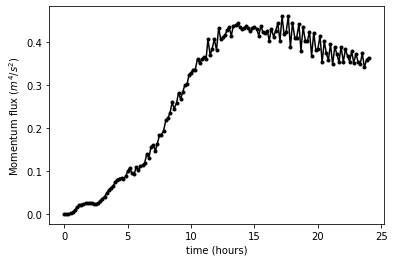

In [302]:
AA = Flux('momentum')
plt.plot(exp.time/3600, AA, 'k.-')
    
plt.ylabel('Momentum flux ($m^4/s^2$)')
plt.xlabel('time (hours)')

Text(0.5, 0, 'time (hours)')

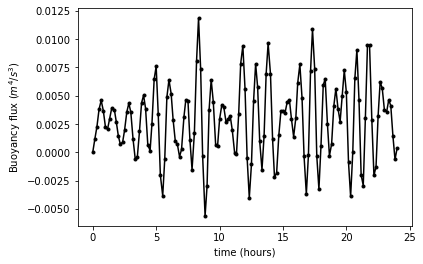

In [303]:
AA = Flux('buoyancy')
plt.plot(exp.time/3600, AA, 'k.-')
plt.ylabel('Buoyancy flux ($m^4/s^3$)')
plt.xlabel('time (hours)')

# forced_plume_32z_00_hist.nc

In [30]:
exp = diagnostics.plume('../../data/Nyles/forced_plume_32z/', 'forced_plume_32z')
exp.params

{'modelname': 'LES',
 'geometry': 'closed',
 'Lx': 4000.0,
 'Ly': 4000.0,
 'Lz': 2000.0,
 'n_tracers': 0,
 'unit_length': 'm',
 'unit_duration': 's',
 'rotating': True,
 'forced': True,
 'coriolis': 0.0001,
 'diff_coef': {},
 'datadir': '~/data/Nyles',
 'expname': 'forced_plume_32z',
 'mode': 'overwrite',
 'variables_in_history': ['b', 'u'],
 'timestep_history': 600.0,
 'simplified_grid': True,
 'include_halo': False,
 'disk_space_warning': 0.5,
 'show': False,
 'iterations_per_frame': 4,
 'style': 'b-interface',
 'stable_stratification': False,
 'aspect': 'equal',
 'rotation_speed': 3,
 'tend': 86400.0,
 'timestepping': 'LFAM3',
 'auto_dt': True,
 'dt': 200.0,
 'cfl': 0.8,
 'dt_max': 200.0,
 'global_nx': 64,
 'global_ny': 64,
 'global_nz': 32,
 'orderVF': 5,
 'orderKE': 5,
 'orderA': 5,
 'npx': 1,
 'npy': 1,
 'npz': 1,
 'nh': 3,
 'npre': 3,
 'npost': 3,
 'ndeepest': 20,
 'omega': 0.8,
 'tol': 0.001,
 'maxite': 20,
 'nglue': 1,
 'ncellscoarsest': 32,
 'nx': 64,
 'ny': 64,
 'nz': 32,
 '

In [31]:
variables = exp.read_vars(['x', 'y', 'z', 'KE'])

In [32]:
x = variables['x']
y = variables['y']
z = variables['z']

XZ, ZX = np.meshgrid(x, z)
XY, YX = np.meshgrid(x, y)

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


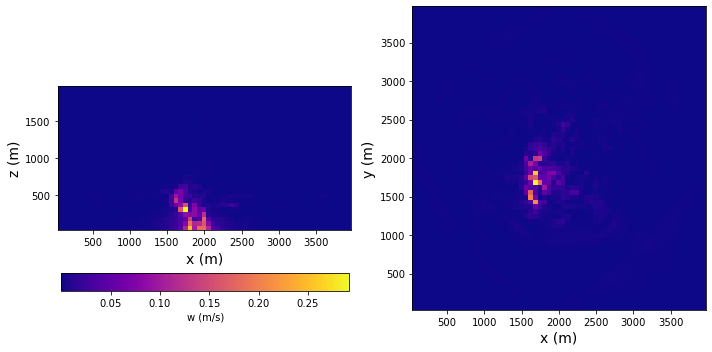

In [33]:
field = variables['KE']#/62.5

n = 70
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x (m)', fontsize=14)
ax1.set_ylabel('z (m)', fontsize=14)

ax2 = plt.subplot(122)
ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
ax2.set_xlabel('x (m)', fontsize=14)
ax2.set_ylabel('y (m)', fontsize=14)

cbaxes = fig.add_axes([0.09, 0.18, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w (m/s)') 

#plt.tight_layout()